In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))


In [ ]:
df = pd.read_csv('../input/NBA_player_of_the_week.csv')

In [ ]:
#gives top 10 rows
df.head(10)

In [ ]:
#gives last 5 rows
df.tail()

In [ ]:
# gives information about dataframe. Like rows name, type, count and using memory kb
df.info()

# gives column's names
df.columns
# gives number of rows and number of columns
df.shape

In [ ]:
# columns renamed with lower() and replace() methods
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

outliers : the values that is considerably higher or lower from rest of data
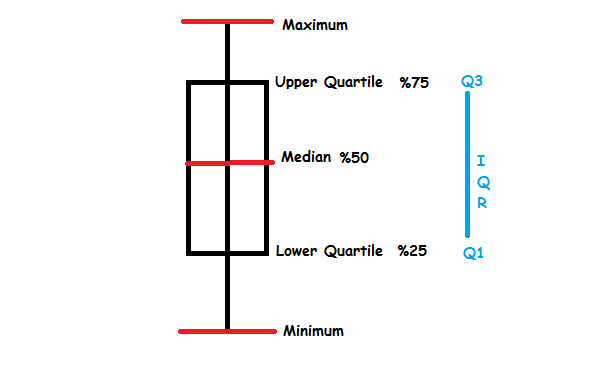


(Q3-Q1) = IQR 
Outlier are smaller than Q1 - 1.5*IQR and bigger than Q3 + 1.5*IQR. 

We will use describe() method. Describe method includes:
* count: number of entries
* mean: average of entries
* std: standart deviation
* min: minimum entry
* 25%: first quantile
* 50%: median or second quantile
* 75%: third quantile
* max: maximum entry

What is quantile?

1,4,5,6,8,9,11,12,13,14,15,16,17
The median is the number that is in middle of the sequence. In this case it would be 11.

The lower quartile is the median in between the smallest number and the median i.e. in between 1 and 11, which is 6.

The upper quartile, you find the median between the median and the largest number i.e. between 11 and 17, which will be 14 according to the question above.

In [ ]:
df.describe()

In [ ]:
# frequency count about chosing column
# for example, Miami Heat has 57 players
df["team"].value_counts(dropna=False)

In [ ]:
#visual exploratory data analysis
df.boxplot(column='age',by='team')
plt.show()

In [ ]:
# melt method example
# frame= data which do melt
# id_vars = id in melt data
# value_vars = what we want to melt
df_new = df.tail(3)

melted = pd.melt(frame=df_new, id_vars='player',value_vars=['height','weight','age'])
melted

In [ ]:
# pivoting data
# reverse melting

melted.pivot(index='player', columns='variable', values='value')

In [ ]:
# concatenating data
# axis=0 by rows, axis=1 by columns, ignore_index=True assign new index
data1 = df.sample(n=10)
data2 = df.sample(n=5)
conc_data_row = pd.concat([data1,data2],axis=0,ignore_index=True)
conc_data_row

data1 = df.player.head()
data2 = df.team.head()
data3 = df.season_short.head()
conc_data_column = pd.concat([data1,data2,data3],axis=1)
conc_data_column

df.sort_values('season_short')

In [ ]:
df.dtypes

In [ ]:
df['conference'] = df.conference.astype('category')
df.dtypes

In [ ]:
# missing data
df.conference.value_counts(dropna=False)
data1 = df.copy()
data1.conference.value_counts(dropna=False)
data1.conference.dropna(inplace=True)
data1


In [ ]:
#assert is control true or false

assert 1==1 # if it is true, return nothing
assert 1==2 # if it isfalse, return error

In [ ]:
assert data1.conference.notnull().all() #return nothing because we drop nan values

In [ ]:
df['conference'] = df.conference.astype('object')
data1.conference.fillna('empty',inplace=True)

data1


In [ ]:
#review pandas
#dataframe from list

country = ["Italy","England"]
population = ["12","25"]

lis_columns = ["country","population"]
lis_rows = [country,population]
zipped = list(zip(lis_columns,lis_rows))

dic = dict(zipped)

data = pd.DataFrame(dic)
data

In [ ]:
data["capital"] = ["Roma","London"]
data

In [ ]:
data["income"] = 0
data

In [ ]:
#virsual exploratary

df1 = df.loc[:,["age","draft_year","season_short"]]
df1.plot()
plt.show()

In [ ]:
df1.plot(subplots=True)

In [ ]:
#scatter plot
df1.plot(kind="scatter",x="age",y="season_short")
plt.show()

In [ ]:
#histogram
# frekans ölçüyor
# range bizim x eksenimiz
# normed frekansının normalize eder 0 ile 1 arasında
df1.plot(kind="hist",y="age",bins=50,range=(0,50),normed=True)
plt.show()

In [ ]:
# histogram subplot with non cumulative and cumulative
# cumulative önceki değerleri toplayarak gidiyor
fig,axes = plt.subplots(nrows=2,ncols=1)
df1.plot(kind="hist", y="age", bins=50,range=(0,50),normed=True,ax=axes[0])
df1.plot(kind="hist", y="age", bins=50,range=(0,50),normed=True,ax=axes[1],cumulative=True)
plt.savefig('graph.png')
plt.show()

**indexing pandas time series**
<br/>
datetime=object

In [ ]:
time_list=["1992-02-26","1991-08-08"]
print(type(time_list[1]))

obj_datetime = pd.to_datetime(time_list)
print(type(obj_datetime))

In [ ]:
df2 = df.head()
date_list = ["2018-01-10","2018-02-10","2018-03-10","2017-7-5","2017-7-1"]
obj_date = pd.to_datetime(date_list)
df2["date"] = obj_date
df2 = df2.set_index("date")
df2

In [ ]:
print(df2.loc["2018-02-10"].player)
print(df2.loc["2017-07-05":"2018-02-10"])

In [ ]:
# resample pandas time series
df2.resample('A').mean() # resample by year and show means
df2.resample('M').mean() # resample by month and show means

In [ ]:
df2.resample('M').first().interpolate("linear") # fill with linear values to numeric NANs

In [ ]:
#indexing and slicing

index_list=[]
i=1
while i<=len(df):
    index_list.append(i)
    i=i+1

df["id"] = index_list
df = df.set_index("id")
df

In [ ]:
df.team[10] #df["team"][10]

In [ ]:
df.loc[5,"team"]

In [ ]:
df[["player","team","season_short"]]

In [ ]:
print(type(df["age"]))
print(type(df[["age"]]))

In [ ]:
df.loc[3:9,"player":"team"]

In [ ]:
df.loc[10:1:-1,"player":"season"]

In [ ]:
df.loc[1:10,"position":]

In [ ]:
#filtering
flt = df.seasons_in_league > 15
df[flt]


In [ ]:
flt1 = df.seasons_in_league > 10
flt2 = df.team == "Houston Rockets"
df[flt1 & flt2]

In [ ]:
# Transforming data

def square(x):
    return x**2

df.age.apply(square)
    


In [ ]:
df.age.apply(lambda x:x/2)

In [ ]:
#defining column using other columns
df["abstract"] = df.player + " - " +df.team + " - " +df.position
df.head()

In [ ]:
print(df.index.name)
df.index.name = "index_name"

data1 = df.copy()
data1.index=range(100,1245,1)
data1.head()

In [ ]:
# hierarchical index
data1 = df.set_index(["team","position"])
data1

In [ ]:
#pivoting data

dic = {"treatment":["A","A","B","B"],"gender":["F","M","F","M"],"response":[10,45,5,9],"age":[15,4,72,65]}
dataframe = pd.DataFrame(dic)
dataframe

In [ ]:
dataframe.pivot(index="treatment",columns="gender",values="response")
dataframe

In [ ]:
#stacking and unsteaking dataframe
dataframe1 = dataframe.set_index(["treatment","gender"])
dataframe1

In [ ]:
dataframe1.unstack(level=0)

In [ ]:
dataframe1.unstack(level=1)

In [ ]:
# translocation to index level
dataframe2 = dataframe1.swaplevel(0,1)
dataframe2

In [ ]:
#melting dataframe
dataframe
pd.melt(dataframe,id_vars = "treatment",value_vars=["age","response"])

In [ ]:
dataframe.groupby("gender").mean()

In [ ]:
dataframe.groupby("treatment").age.max()

In [ ]:
dataframe.groupby("gender")[["age","response"]].min()